In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [5]:
# read csv file
df = pd.read_csv("OutputParsed/all_features_parsed_concat.csv")

In [7]:
df

,champ_name,counter_name,championId,counterId,champ_kda,counter_kda,champ_lane kill rate,counter_lane kill rate,champ_kill participation,counter_kill participation,champ_dmgtochamp,counter_dmgtochamp,champ_first tower kill,counter_first tower kill,champ_win ratio,counter_win ratio,champ_position win rate,counter_position win rate,champ_position pick rate,counter_position pick rate,champ_ban rate,counter_ban rate,position
0,Irelia,Illaoi,39,420,1.87,1.49,0.5806,0.4194,0.387,0.330,20466.0,21530.0,0 days 00:16:53,0 days 00:17:03,0.5005,0.4995,0.4577,0.4889,0.0677,0.0081,0.1462,0.0031,top
1,Darius,Yone,122,777,2.29,1.53,0.6598,0.3402,0.390,0.362,17166.0,18266.0,0 days 00:16:52,0 days 00:15:13,0.5513,0.4487,0.5073,0.4743,0.0449,0.0071,0.1331,0.0515,top
2,Warwick,Trundle,19,48,1.96,1.71,0.5875,0.4125,0.406,0.381,18181.0,17817.0,0 days 00:16:24,0 days 00:18:01,0.4444,0.5556,0.5144,0.4938,0.0116,0.0065,0.0030,0.0007,top
3,Ornn,Viego,516,234,2.89,1.63,0.6614,0.3386,0.431,0.363,15359.0,18478.0,0 days 00:17:28,0 days 00:17:47,0.5455,0.4545,0.5259,0.4815,0.0432,0.0141,0.0050,0.1378,top
4,Trundle,Irelia,48,39,1.96,1.53,0.5293,0.4707,0.404,0.366,16811.0,18085.0,0 days 00:16:11,0 days 00:15:14,0.5465,0.4535,0.4917,0.4554,0.0065,0.0681,0.0007,0.1469,top
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9942,Lulu,Zilean,117,26,2.97,3.18,0.5687,0.4313,0.370,0.404,NaN,NaN,NaN,NaN,0.4798,0.5202,0.5068,0.5211,0.1701,0.0313,0.1765,0.0063,sup
9943,Vel'Koz,Pantheon,161,80,2.26,1.86,0.5206,0.4794,0.451,0.411,NaN,NaN,NaN,NaN,0.5268,0.4732,0.4896,0.4750,0.0151,0.0303,0.0012,0.1074,sup
9944,Swain,Morgana,50,25,2.19,2.42,0.4955,0.5045,0.460,0.457,NaN,NaN,NaN,NaN,0.5154,0.4846,0.4792,0.4930,0.0193,0.0487,0.0096,0.4907,sup
9945,Poppy,Zilean,78,26,2.43,2.81,0.5461,0.4539,0.416,0.460,NaN,NaN,NaN,NaN,0.4835,0.5165,0.4897,0.5211,0.0078,0.0313,0.0385,0.0063,sup


In [8]:
df.columns

Index(['champ_name', 'counter_name', 'championId', 'counterId', 'champ_kda',
       'counter_kda', 'champ_lane kill rate', 'counter_lane kill rate',
       'champ_kill participation', 'counter_kill participation',
       'champ_dmgtochamp', 'counter_dmgtochamp', 'champ_first tower kill',
       'counter_first tower kill', 'champ_win ratio', 'counter_win ratio',
       'champ_position win rate', 'counter_position win rate',
       'champ_position pick rate', 'counter_position pick rate',
       'champ_ban rate', 'counter_ban rate', 'position'],
      dtype='object')

In [36]:
df_cor = df[['champ_kda', 
              'champ_lane kill rate', 
             'champ_kill participation',  
             'champ_dmgtochamp', 
             'champ_first tower kill', 
             'champ_win ratio',
             'champ_ban rate',
            'champ_position pick rate',
            'champ_position win rate']]

In [25]:
df['champ_first tower kill'] = pd.to_timedelta(df['champ_first tower kill'])



In [32]:
df_cor.dtypes

champ_kda                           float64
champ_lane kill rate                float64
champ_kill participation            float64
champ_dmgtochamp                    float64
champ_first tower kill      timedelta64[ns]
champ_ban rate                      float64
champ_position win rate             float64
champ_position pick rate            float64
champ_win ratio                     float64
dtype: object

In [ ]:
df_cor['champKda']=df_cor['champKda'].astype(float, errors = 'raise')

In [ ]:
df_cor['champDmgToChamp']=df_cor['champDmgToChamp'].str[0:].astype('float')

In [37]:
corr = df_cor.corr()
df_cor.corr()

,champ_kda,champ_lane kill rate,champ_kill participation,champ_dmgtochamp,champ_win ratio,champ_ban rate,champ_position pick rate,champ_position win rate
champ_kda,1.000000,0.270533,0.676944,-0.318250,0.358068,0.007778,0.113620,0.280139
champ_lane kill rate,0.270533,1.000000,0.116521,0.002419,0.311136,0.097669,0.050251,0.093741
champ_kill participation,0.676944,0.116521,1.000000,-0.159165,0.130619,0.119118,0.147469,0.156718
champ_dmgtochamp,-0.318250,0.002419,-0.159165,1.000000,0.007326,0.065995,0.052286,-0.077240
champ_win ratio,0.358068,0.311136,0.130619,0.007326,1.000000,0.002101,0.008147,0.391822
champ_ban rate,0.007778,0.097669,0.119118,0.065995,0.002101,1.000000,0.524115,0.027899
champ_position pick rate,0.113620,0.050251,0.147469,0.052286,0.008147,0.524115,1.000000,0.042188
champ_position win rate,0.280139,0.093741,0.156718,-0.077240,0.391822,0.027899,0.042188,1.000000


In [15]:
# Use this function to get desired color
sns.choose_diverging_palette()


interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

[(0.2519971417644415, 0.4987337088076726, 0.5751602783606602),
 (0.43156001218774975, 0.6160490836499025, 0.6735874169971766),
 (0.611122882611058, 0.7333644584921324, 0.7720145556336929),
 (0.7906857530343663, 0.8506798333343624, 0.8704416942702093),
 (0.95, 0.95, 0.95),
 (0.9282549678814984, 0.7863704363662967, 0.7963965173228867),
 (0.9022582584936525, 0.6005186021022944, 0.622400049291663),
 (0.8762615491058064, 0.4146667678382919, 0.44840358126043944),
 (0.8510408608937171, 0.23436274952246883, 0.2796010376480583)]

<AxesSubplot:>

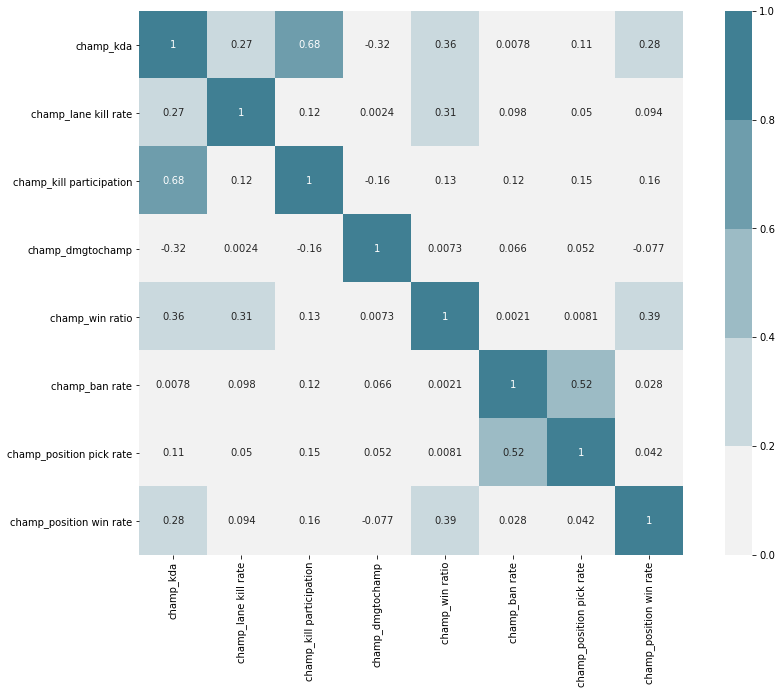

In [38]:


plt.figure(figsize=(15, 10))
sns.heatmap(df_cor.corr(), 
            vmin = 0,vmax = 1,
            cmap = [(0.95, 0.95, 0.95),
                    (0.7906857530343663, 0.8506798333343624, 0.8704416942702093),
                     (0.611122882611058, 0.7333644584921324, 0.7720145556336929),
                    (0.43156001218774975, 0.6160490836499025, 0.6735874169971766),
                (0.2519971417644415, 0.4987337088076726, 0.5751602783606602)], 
            square = True,
            annot=True)

In [39]:
mask = np.triu(np.ones_like(corr, dtype = bool))
cmap = sns.diverging_palette(220, 10, as_cmap= True)


<AxesSubplot:>

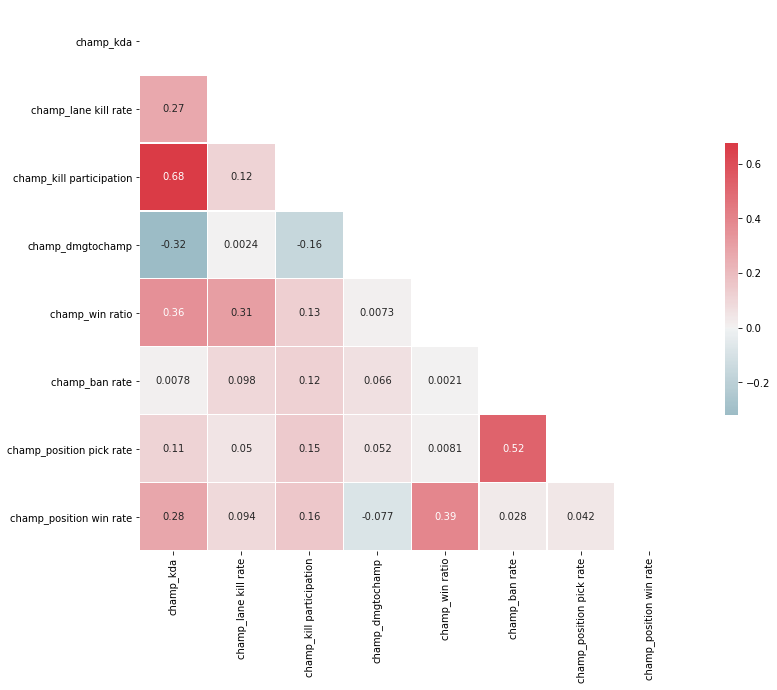

In [42]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr, mask = mask, cmap = cmap, center = 0, 
           square = True, linewidth = .5, cbar_kws ={"shrink":.5},
           annot = True)